In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

m_W = 80.379
m_Z = 91.1876
sin_sq = 1 - (m_W / m_Z) ** 2 # dimensionless
m_h = 125.1
alpha = 1 / 132.184
e = (4 * np.pi * alpha) ** 0.5
m_e = 0.511E-3
m_m = 105.66E-3

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

In [6]:
m = m_m
E_phot_min = 5 #GeV
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = t_min(s_max_fix, m)
t_max_fix = (m_h - m) ** 2

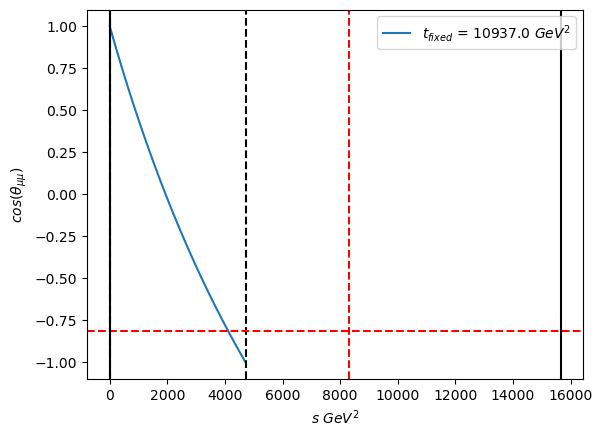

In [49]:
t_pick = t_min_fix + 0.7 * (t_max_fix - t_min_fix)
s_vals = np.linspace(s_func_min(m, t_pick), s_func_max(m, t_pick), 1000)
u = m_h ** 2 + 2 * m ** 2 - s_vals - t_pick
E_u = E_l(m, u)
E_t = E_lbar(m, t_pick)
vals = cos_ll(m, E_u, E_t, s_vals)
plt.xlabel(r'$s$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta_{\mu\mu})$')
plt.plot(s_vals, vals, label = r'$t_{fixed}$ = '+str(round(t_pick, 0))+' $GeV^{2}$')
plt.axvline(s_func_min(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(s_func_max(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(m_Z ** 2, color = 'red', linestyle = 'dashed')
plt.axhline(-0.8127, color = 'red', linestyle = 'dashed')
plt.axvline(4 * m ** 2, color = 'k')
plt.axvline(m_h ** 2, color = 'k')
#plt.xlim(0, 200)
plt.legend()
plt.show()

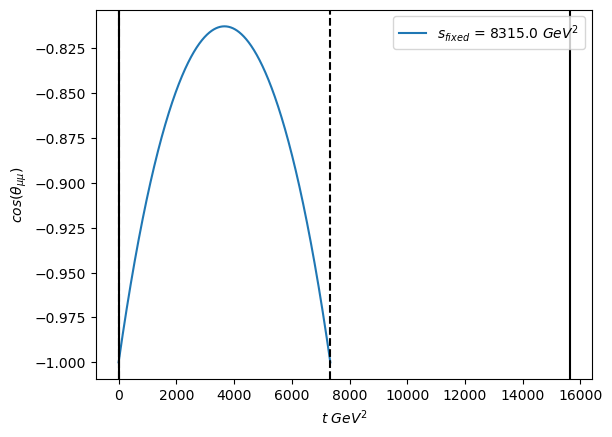

-0.812651458795432


In [50]:
#s_pick = s_min_fix + 0.99 * (s_max_fix - s_min_fix)
s_pick = m_Z ** 2
t_vals = np.linspace(t_min(s_pick, m), t_max(s_pick, m), 1000)
u_alt = m_h ** 2 + 2 * m ** 2 - s_pick - t_vals
E_u = E_l(m, u_alt)
E_t = E_lbar(m, t_vals)
vals_alt = cos_ll(m, E_u, E_t, s_pick)
plt.xlabel(r'$t$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta_{\mu\mu})$')
plt.plot(t_vals, vals_alt, label = r'$s_{fixed}$ = '+str(round(s_pick, 0))+' $GeV^{2}$')
plt.axvline(m ** 2, color = 'k')
plt.axvline((m_h - m) ** 2, color = 'k')
plt.axvline(t_min(s_pick, m), color = 'k', linestyle = 'dashed')
plt.axvline(t_max(s_pick, m), color = 'k', linestyle = 'dashed')
plt.legend()
plt.show()
print(max(vals_alt))

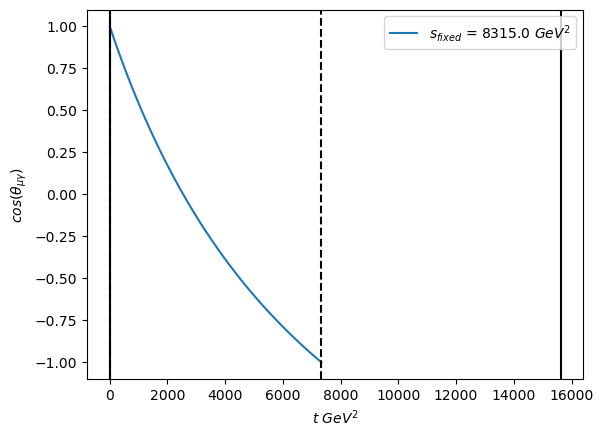

In [48]:
#s_pick = s_min_fix + 0.99 * (s_max_fix - s_min_fix)
s_pick = m_Z ** 2
t_vals = np.linspace(t_min(s_pick, m), t_max(s_pick, m), 100)
u_alt = m_h ** 2 + 2 * m ** 2 - s_pick - t_vals
E_u = E_l(m, u_alt)
E_s = E_phot(m, s_pick)
vals_alt = cos_lk(m, E_u, E_s, t_vals)
plt.xlabel(r'$t$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta_{\mu\gamma})$')
plt.plot(t_vals, vals_alt, label = r'$s_{fixed}$ = '+str(round(s_pick, 0))+' $GeV^{2}$')
plt.axvline(m ** 2, color = 'k')
plt.axvline((m_h - m) ** 2, color = 'k')
plt.axvline(t_min(s_pick, m), color = 'k', linestyle = 'dashed')
plt.axvline(t_max(s_pick, m), color = 'k', linestyle = 'dashed')
plt.legend()
plt.show()

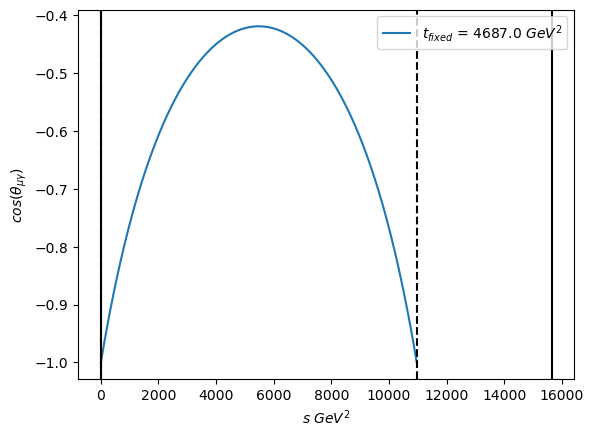

In [51]:
t_pick = t_min_fix + 0.3 * (t_max_fix - t_min_fix)
s_vals = np.linspace(s_func_min(m, t_pick), s_func_max(m, t_pick), 100)
u = m_h ** 2 + 2 * m ** 2 - s_vals - t_pick
E_u = E_l(m, u)
E_s = E_phot(m, s_vals)
vals = cos_lk(m, E_u, E_s, t_pick)
plt.xlabel(r'$s$ $GeV^{2}$')
plt.ylabel(r'$cos(\theta_{\mu\gamma})$')
plt.plot(s_vals, vals, label = r'$t_{fixed}$ = '+str(round(t_pick, 0))+' $GeV^{2}$')
plt.axvline(s_func_min(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(s_func_max(m, t_pick), color = 'k', linestyle = 'dashed')
plt.axvline(4 * m ** 2, color = 'k')
plt.axvline(m_h ** 2, color = 'k')
plt.legend()
plt.show()